# Project 2 - Classification and regression using Neural Networks

This notebook contains the code which produces all results for the Project 2 report in FYS-STK4155.

*Fall 2025*

**Authors:** Jenny Guldvog, Ingvild Olden Bjerklund, Sverre Manu Johansen & Kjersti Stangeland

- 1500 datapoints
- 0.01 learning ratest
- 20   batch size
- 300 epochs / 100
- beta1 og beta2
- sjekk Kjersti test train split

### Import packages, and prep train and test data:

In [1]:
import sys, os
from pathlib import Path
import matplotlib.pyplot as plt
import time
import autograd.numpy as np
import numpy as np
from autograd import grad, elementwise_grad
from typing import Tuple, List
import seaborn as sns
import pandas as pd

project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(project_root)

from functions import *

%load_ext autoreload
%autoreload 2

In [2]:
# For plotting

import matplotlib.style as mplstyle

mplstyle.use(["ggplot", "fast"])

# plt.rcParams.update({
#     'font.size': 16,          
#     'axes.titlesize': 18,     
#     'axes.labelsize': 16,   
#     'xtick.labelsize': 14,  
#     'ytick.labelsize': 14,
#     'legend.fontsize': 14,    
#     'figure.titlesize': 20,   
# })

#plt.rcParams['figure.figsize'] = (8, 6)

sns.set_context("notebook", font_scale=1.3)
sns.set_style("whitegrid")

In [3]:
# Scikit-Learn :
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [4]:
# Tensorflow-Keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam     # NB! Remember this definition !!
from keras.callbacks import EarlyStopping
from keras.regularizers import l1, l2      # NB! Remember this definition !!

In [5]:
# PyTorch : 
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

In [6]:
# For reproducibility
# Same seed as project 1
np.random.seed(2018)
seed = np.random.seed(2018)
torch.manual_seed(2018)
torch.cuda.manual_seed_all(2018)
tf.random.set_seed(2018)

In [7]:
# Same data set as in project 1
n = 1500
x = np.linspace(-1, 1, n)
x = x.reshape(-1, 1)

y = runge_function(x) + np.random.normal(0, 0.1, (n,1))

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=seed)

X_mean = X_train.mean(axis=0)
X_train_norm = (X_train - X_mean)
X_test_norm  = (X_test - X_mean)

In [8]:
# All data used :
#inputs  = x
#targets = y
# Split into test and train :
inputs  = X_train_norm
targets = y_train
# Optionally add validationsplit :
# inputs  = ...
# targets = ...

x_test  = X_test_norm
y_test  = y_test

### Replacement, shuffling

In [9]:
# reg_nn_adam1    = NeuralNetwork(1, [10, 10, 1], [sigmoid, sigmoid, identity], [derivate(sigmoid), derivate(sigmoid), derivate(identity)], mse, mse_der)
# reg_nn_RMSProp1 = NeuralNetwork(1, [10, 10, 1], [sigmoid, sigmoid, identity], [derivate(sigmoid), derivate(sigmoid), derivate(identity)], mse, mse_der)
# reg_nn_gd1      = NeuralNetwork(1, [10, 10, 1], [sigmoid, sigmoid, identity], [derivate(sigmoid), derivate(sigmoid), derivate(identity)], mse, mse_der)
# reg_nn_adam2    = NeuralNetwork(1, [10, 10, 1], [sigmoid, sigmoid, identity], [derivate(sigmoid), derivate(sigmoid), derivate(identity)], mse, mse_der)
# reg_nn_RMSProp2 = NeuralNetwork(1, [10, 10, 1], [sigmoid, sigmoid, identity], [derivate(sigmoid), derivate(sigmoid), derivate(identity)], mse, mse_der)
# reg_nn_gd2      = NeuralNetwork(1, [10, 10, 1], [sigmoid, sigmoid, identity], [derivate(sigmoid), derivate(sigmoid), derivate(identity)], mse, mse_der)

In [10]:
# reg_nn_adam1.train_SGD(inputs, targets,    epochs=500, learning_rate=0.01, batch_size=16, optimizer="Adam")
# reg_nn_RMSProp1.train_SGD(inputs, targets, epochs=500, learning_rate=0.01, batch_size=16, optimizer="RMSProp")
# reg_nn_gd1.train_SGD(inputs, targets,      epochs=500, learning_rate=0.01, batch_size=16)
# reg_nn_adam2.train_SGD_v2(inputs, targets,    epochs=500, learning_rate=0.01, batch_size=16, optimizer="Adam",    shuffle=False, beta1=0.9, beta2=0.99,  early_stopping=False, tolerance=1e-15, replace=False)
# reg_nn_RMSProp2.train_SGD_v2(inputs, targets, epochs=500, learning_rate=0.01, batch_size=16, optimizer="RMSProp", shuffle=False, beta1=0.9, beta2=0.99,  early_stopping=False, tolerance=1e-15, replace=False)
# reg_nn_gd2.train_SGD_v2(inputs, targets,      epochs=500, learning_rate=0.01, batch_size=16, optimizer='gd',      shuffle=False, beta1=0.9, beta2=0.99,  early_stopping=False, tolerance=1e-15, replace=False)


# plt.figure(figsize=(20,10))
# plt.plot(reg_nn_gd1.training_info["Cost_history"],      c='k', alpha=0.5, linewidth=2.5, linestyle='--', label="Gradient Descent - replacement")
# plt.plot(reg_nn_RMSProp1.training_info["Cost_history"], c='b', alpha=0.5, linewidth=2.5, linestyle='--', label="RMSProp - replacement")
# plt.plot(reg_nn_adam1.training_info["Cost_history"],    c='r', alpha=0.5, linewidth=2.5, linestyle='--', label="Adam - replacement")
# plt.plot(reg_nn_gd2.training_info["Cost_history"],      c='k', linewidth=2.5, linestyle='-', label="Gradient Descent - no replacement")
# plt.plot(reg_nn_RMSProp2.training_info["Cost_history"], c='b', linewidth=2.5, linestyle='-', label="RMSProp - no replacement")
# plt.plot(reg_nn_adam2.training_info["Cost_history"],    c='r', linewidth=2.5, linestyle='-', label="Adam - no replacement")
# plt.xlabel("Epochs", fontsize=20)
# plt.ylabel("Cost", fontsize=20)
# plt.yscale("log")
# plt.title("Compraison of different gradient decent optimizer methods", fontsize=25)
# plt.legend(fontsize=20)
# # Increase tick label font size
# plt.tick_params(axis='both', which='major', labelsize=20)  # Adjust font size here
# plt.show()

In [11]:
# reg_nn_adam1    = NeuralNetwork(1, [8, 1], [sigmoid, identity], [derivate(sigmoid), derivate(identity)], mse, mse_der)
# reg_nn_RMSProp1 = NeuralNetwork(1, [8, 1], [sigmoid, identity], [derivate(sigmoid), derivate(identity)], mse, mse_der)
# reg_nn_gd1      = NeuralNetwork(1, [8, 1], [sigmoid, identity], [derivate(sigmoid), derivate(identity)], mse, mse_der)
# reg_nn_adam2    = NeuralNetwork(1, [8, 1], [sigmoid, identity], [derivate(sigmoid), derivate(identity)], mse, mse_der)
# reg_nn_RMSProp2 = NeuralNetwork(1, [8, 1], [sigmoid, identity], [derivate(sigmoid), derivate(identity)], mse, mse_der)
# reg_nn_gd2      = NeuralNetwork(1, [8, 1], [sigmoid, identity], [derivate(sigmoid), derivate(identity)], mse, mse_der)

In [12]:
# reg_nn_adam1.train_SGD(inputs, targets,    epochs=500, learning_rate=0.01, batch_size=16, optimizer="Adam")
# reg_nn_RMSProp1.train_SGD(inputs, targets, epochs=500, learning_rate=0.01, batch_size=16, optimizer="RMSProp")
# reg_nn_gd1.train_SGD(inputs, targets,      epochs=500, learning_rate=0.01, batch_size=16)
# reg_nn_adam2.train_SGD_v2(inputs, targets,    epochs=500, learning_rate=0.01, batch_size=16, optimizer="Adam",    shuffle=True, beta1=0.9, beta2=0.99,  early_stopping=False, tolerance=1e-15, replace=True)
# reg_nn_RMSProp2.train_SGD_v2(inputs, targets, epochs=500, learning_rate=0.01, batch_size=16, optimizer="RMSProp", shuffle=True, beta1=0.9, beta2=0.99,  early_stopping=False, tolerance=1e-15, replace=True)
# reg_nn_gd2.train_SGD_v2(inputs, targets,      epochs=500, learning_rate=0.01, batch_size=16, optimizer='gd',      shuffle=True, beta1=0.9, beta2=0.99,  early_stopping=False, tolerance=1e-15, replace=True)


# plt.figure(figsize=(20,10))
# plt.plot(reg_nn_gd1.training_info["Cost_history"],      c='k', alpha=0.5, linewidth=2.5, linestyle='--', label="Gradient Descent - no shuffle")
# plt.plot(reg_nn_RMSProp1.training_info["Cost_history"], c='b', alpha=0.5, linewidth=2.5, linestyle='--', label="RMSProp - no shuffle")
# plt.plot(reg_nn_adam1.training_info["Cost_history"],    c='r', alpha=0.5, linewidth=2.5, linestyle='--', label="Adam - no shuffle")
# plt.plot(reg_nn_gd2.training_info["Cost_history"],      c='k', linewidth=2.5, linestyle='-', label="Gradient Descent - shuffle")
# plt.plot(reg_nn_RMSProp2.training_info["Cost_history"], c='b', linewidth=2.5, linestyle='-', label="RMSProp - shuffle")
# plt.plot(reg_nn_adam2.training_info["Cost_history"],    c='r', linewidth=2.5, linestyle='-', label="Adam - shuffle")
# plt.xlabel("Epochs", fontsize=20)
# plt.ylabel("Cost", fontsize=20)
# plt.yscale("log")
# plt.title("Compraison of different gradient decent optimizer methods", fontsize=25)
# plt.legend(fontsize=20)
# # Increase tick label font size
# plt.tick_params(axis='both', which='major', labelsize=20)  # Adjust font size here
# plt.show()

In [13]:
# reg_nn_adam1    = NeuralNetwork(1, [10, 10, 1], [RELU, RELU, identity], [derivate(RELU), derivate(RELU), derivate(identity)], mse, mse_der)
# reg_nn_RMSProp1 = NeuralNetwork(1, [10, 10, 1], [RELU, RELU, identity], [derivate(RELU), derivate(RELU), derivate(identity)], mse, mse_der)
# reg_nn_gd1      = NeuralNetwork(1, [10, 10, 1], [RELU, RELU, identity], [derivate(RELU), derivate(RELU), derivate(identity)], mse, mse_der)
# reg_nn_adam2    = NeuralNetwork(1, [10, 10, 1], [RELU, RELU, identity], [derivate(RELU), derivate(RELU), derivate(identity)], mse, mse_der)
# reg_nn_RMSProp2 = NeuralNetwork(1, [10, 10, 1], [RELU, RELU, identity], [derivate(RELU), derivate(RELU), derivate(identity)], mse, mse_der)
# reg_nn_gd2      = NeuralNetwork(1, [10, 10, 1], [RELU, RELU, identity], [derivate(RELU), derivate(RELU), derivate(identity)], mse, mse_der)

In [14]:
# reg_nn_adam1.train_SGD(inputs, targets,    epochs=500, learning_rate=0.01, batch_size=16, optimizer="Adam")
# reg_nn_RMSProp1.train_SGD(inputs, targets, epochs=500, learning_rate=0.01, batch_size=16, optimizer="RMSProp")
# reg_nn_gd1.train_SGD(inputs, targets,      epochs=500, learning_rate=0.01, batch_size=16)
# reg_nn_adam2.train_SGD_v2(inputs, targets,    epochs=500, learning_rate=0.01, batch_size=16, optimizer="Adam",    shuffle=True, beta1=0.9, beta2=0.99,  early_stopping=False, tolerance=1e-15, replace=True)
# reg_nn_RMSProp2.train_SGD_v2(inputs, targets, epochs=500, learning_rate=0.01, batch_size=16, optimizer="RMSProp", shuffle=True, beta1=0.9, beta2=0.99,  early_stopping=False, tolerance=1e-15, replace=True)
# reg_nn_gd2.train_SGD_v2(inputs, targets,      epochs=500, learning_rate=0.01, batch_size=16, optimizer='gd',      shuffle=True, beta1=0.9, beta2=0.99,  early_stopping=False, tolerance=1e-15, replace=True)


# plt.figure(figsize=(20,10))
# plt.plot(reg_nn_gd1.training_info["Cost_history"],      c='k', alpha=0.5, linewidth=2.5, linestyle='--', label="Gradient Descent - no shuffle")
# plt.plot(reg_nn_RMSProp1.training_info["Cost_history"], c='b', alpha=0.5, linewidth=2.5, linestyle='--', label="RMSProp - no shuffle")
# plt.plot(reg_nn_adam1.training_info["Cost_history"],    c='r', alpha=0.5, linewidth=2.5, linestyle='--', label="Adam - no shuffle")
# plt.plot(reg_nn_gd2.training_info["Cost_history"],      c='k', linewidth=2.5, linestyle='-', label="Gradient Descent - shuffle")
# plt.plot(reg_nn_RMSProp2.training_info["Cost_history"], c='b', linewidth=2.5, linestyle='-', label="RMSProp - shuffle")
# plt.plot(reg_nn_adam2.training_info["Cost_history"],    c='r', linewidth=2.5, linestyle='-', label="Adam - shuffle")
# plt.xlabel("Epochs", fontsize=20)
# plt.ylabel("Cost", fontsize=20)
# plt.yscale("log")
# plt.title("Compraison of different gradient decent optimizer methods", fontsize=25)
# plt.legend(fontsize=20)
# # Increase tick label font size
# plt.tick_params(axis='both', which='major', labelsize=20)  # Adjust font size here
# plt.show()

## Part c) Testing agains other software libraries

##### 1) Test against Scikit-Learn, tensorflow.keras or PyTorch

You should test your results against a similar code using **Scikit-Learn** (see the examples in the above lecture notes from weeks 41 and 42) or **tensorflow/keras** or **Pytorch** (for Pytorch, see Raschka et al.'s text chapters 12 and 13). 

In [15]:
# Define hyperparameters:
network_input_size          = 1
seed                        = None       # Determines random number generation for weights and bias initialization?
learning_rate               = 0.01       # The initial learning rate used. It controls the step-size in updating the weights. 
epochs                      = 1000       # Number of total iterations.
batch_size                  = 20         # Size of minibatches for stochastic optimizers. (previous 16)
shuffle                     = True       # Whether to shuffle samples in each iteration.
early_stopping              = False      # Whether to use early stopping to terminate training when validation score is not improving.
tolerance                   = 1e-15      # Tolerance for the optimization. When the loss or score is not improving by at least tol
replacement                 = False      # Create batches with replacement or not in SGD
beta_1                      = 0.9        # ADAM: Exponential decay rate for estimates of first moment vector in adam, should be in [0, 1).
beta_2                      = 0.999      # ADAM: Exponential decay rate for estimates of second moment vector in adam, should be in [0, 1).
# Scikit-learn specific:
scikit_lr_type              = 'adaptive' # 'constant', 'adaptive' or 'invscaling'
scikit_alpha                = 0          # L2 regularization term
scikit_verbose              = False      # Whether to print progress messages to stdout.
scikit_warm_start           = False      # When set to True, reuse the solution of the previous call to fit as initialization, otherwise, 
                                         # just erase the previous solution. 
scikit_momentum             = 0.9        # Momentum for gradient descent update. Should be between 0 and 1. Only used when solver=’sgd’.
scikit_nesterovs_momentum   = False      # Whether to use Nesterov’s momentum. Only used when solver=’sgd’ and momentum > 0.
scikit_validation_fraction  = 0          # The proportion of training data to set aside as validation set for early stopping. Must be between 0 and 1. 
                                         # Only used if early_stopping is True.
scikit_epsilon              = 1e-8       # Value for numerical stability in adam. Only used when solver=’adam’.
scikit_n_iter_no_change     = epochs     # Maximum number of epochs to not meet tol improvement. Only effective when solver=’sgd’ or ‘adam’.
                                         # For it to run until the end, keep this as big as the epochs !
# Keras specific:
keras_verbose               = 0          # Whether to print progress messages to stdout. 1 is print
# Cost function:
FFNN_cost_fun               = mse
FFNN_cost_fun_der           = mse_der
keras_cost_fun              = 'mean_squared_error'
# Solver/optimizer:
FFN_solver                  = 'Adam'
scikit_solver               = 'adam' #'adam', 'sgd', 
keras_solver                = Adam(learning_rate = learning_rate, 
                                   beta_1        = beta_1, 
                                   beta_2        = beta_2, 
                                   epsilon       = scikit_epsilon) # SGD(learning_rate=learning_rate)
pytorch_solver              = 'adam'       # ---> hardcoded in function, for now only option!

In [16]:
# First simple network arcitecture with only one layer, and 10 nodes : 
nn1_FFNN_layers    = [10, 1]           # The last element is the outputlayer 
nn1_scikit_layer   = (10, 1)           # The ith element represents the number of neurons in the ith hidden layer.
nn1_keras_layers   = [10, 1]           # The last element is the outputlayer.
nn1_pytorch_layers = [1,10,1]          # First element is input, last element is output layer.
# Activation functions:
FFNN_act_fun     = [sigmoid, identity] # Identity for the output layer
FFNN_act_fun_der = [derivate(sigmoid), derivate(identity)]
scikit_act_fun   = 'logistic'          # 'identity', 'logistic', tanh', 'relu' --> NB! No option for sigmoid, but logistic should be the same
                                       # Only for hidden layers, output is idendity by default
keras_act_fun    = ['sigmoid', 'linear'] 
# Forp pytorch signoid is hard-coded as activation fucntion for all hidden layers, and identity for the output layer


# Second complex network architecture with 5 layers, and 10 nodes each:
nn2_FFNN_layers   = [10, 10, 10, 10, 10, 1]    # Five hidden layers with 10 nodes each and one output layer
nn2_scikit_layer  = (10, 10, 10, 10, 10, 1)    # Five hidden layers with 10 nodes each and one output layer
nn2_keras_layers  = [10, 10, 10, 10, 10, 1]    # Five hidden layers with 10 nodes each and one output layer
nn2_pytorch_layers = [1,10, 10, 10, 10, 10, 1] # Five hidden layers with 10 nodes each and one output layer

In [17]:
def FFNN(network_input_size, FFNN_layers, FFNN_act_fun, FFNN_act_fun_der, FFNN_cost_fun, FFNN_cost_fun_der,
         inputs, targets, epochs, learning_rate, batch_size, optimizer, shuffle, beta1, beta2, replace, x_test, y_test):
    # Initialize the network, so that the weights are not remembered
    Regression_FFNN = NeuralNetwork(network_input_size,FFNN_layers,FFNN_act_fun,FFNN_act_fun_der,FFNN_cost_fun,FFNN_cost_fun_der)
    # Start the timer
    start_time = time.time()
    # Train the model
    #Regression_FFNN.train_SGD(inputs, targets, learning_rate = learning_rate, epochs = epochs, batch_size = batch_size, optimizer = FFN_solver)
    Regression_FFNN.train_SGD_v2(inputs, targets, epochs, learning_rate, batch_size, optimizer, shuffle, beta1, beta2, replace)
    # Make predictions
    y_pred = Regression_FFNN._feed_forward(x_test)
    # Calculate mean squared error
    mse_proj2  = mse(y_pred, y_test)
    mse_proj22 = mean_squared_error(y_test, y_pred)
    # Calculate elapsed time
    elapsed_time_FFNN = time.time() - start_time
    # Print results
    print(f"Project-2 MSE: {mse_proj2}")
    print(f"Project-2 MSE: {mse_proj22}")
    print(f"Elapsed time: {elapsed_time_FFNN:.2f} seconds")
    return Regression_FFNN, elapsed_time_FFNN, mse_proj2, y_pred

In [18]:
Regression_FFNN, elapsed_time_FFNN, mse_proj2, y_pred = FFNN(network_input_size, nn1_FFNN_layers, FFNN_act_fun, FFNN_act_fun_der, FFNN_cost_fun, FFNN_cost_fun_der,
                                          inputs, targets, epochs, learning_rate, batch_size, FFN_solver, shuffle, beta_1, beta_2, replacement, x_test, y_test)

Project-2 MSE: 0.0104798156117574
Project-2 MSE: 0.0104798156117574
Elapsed time: 20.10 seconds


In [19]:
def scikitFFNN(scikit_layer, scikit_act_fun, scikit_solver, scikit_alpha, batch_size, scikit_lr_type, learning_rate,
               epochs, shuffle, seed, tolerance, scikit_verbose, scikit_warm_start, scikit_momentum, scikit_nesterovs_momentum,
               early_stopping, scikit_validation_fraction, beta_1, beta_2, scikit_epsilon, scikit_n_iter_no_change,
               inputs, targets, x_test, y_test):
    # Start the timer
    start_time = time.time()
    # Create and train the Scikit-Learn model --> Multi-layer Perceptron regressor : 
    sklearn_model = MLPRegressor(#loss='squared_error', 
                                hidden_layer_sizes  = scikit_layer, 
                                activation          = scikit_act_fun, # Only on the hidden layers, last have identity as default
                                solver              = scikit_solver,
                                alpha               = scikit_alpha,
                                batch_size          = batch_size,
                                learning_rate       = scikit_lr_type,
                                learning_rate_init  = learning_rate, 
                                # power_t=0.5, # The exponent for inverse scaling learning rate. 
                                # It is used in updating effective learning rate when the learning_rate is set to ‘invscaling’. Only used when solver=’sgd’.
                                max_iter            = epochs, 
                                shuffle             = shuffle, 
                                random_state        = seed, 
                                tol                 = tolerance, 
                                verbose             = scikit_verbose,
                                warm_start          = scikit_warm_start,
                                momentum            = scikit_momentum,
                                nesterovs_momentum  = scikit_nesterovs_momentum,
                                early_stopping      = early_stopping,
                                validation_fraction = scikit_validation_fraction,
                                beta_1              = beta_1,
                                beta_2              = beta_2,
                                epsilon             = scikit_epsilon,
                                n_iter_no_change    = scikit_n_iter_no_change,
                                # max_fun=15000, # Only used when solver=’lbfgs’. 
                                )
    sklearn_model.fit(inputs, targets.ravel())
    # Predictions
    y_pred_sklearn = sklearn_model.predict(x_test)
    # Calculate mean squared error
    mse_sklearn  = mse(y_pred_sklearn, y_test.flatten())
    mse_sklearn2 = mean_squared_error(y_test, y_pred_sklearn)
    # Calculate elapsed time
    elapsed_time_scikit = time.time() - start_time
    print(f"Scikit-Learn MSE: {mse_sklearn}")
    print(f"Scikit-Learn MSE: {mse_sklearn2}")
    print(f"Elapsed time: {elapsed_time_scikit:.2f} seconds")
    return sklearn_model, elapsed_time_scikit, mse_sklearn, y_pred_sklearn

In [20]:
sklearn_model, elapsed_time_scikit, mse_sklearn, y_pred_sklearn = scikitFFNN(nn1_scikit_layer, scikit_act_fun, scikit_solver, scikit_alpha, batch_size, scikit_lr_type, learning_rate,
                                                epochs, shuffle, seed, tolerance, scikit_verbose, scikit_warm_start, scikit_momentum, scikit_nesterovs_momentum,
                                                early_stopping, scikit_validation_fraction, beta_1, beta_2, scikit_epsilon, scikit_n_iter_no_change,
                                                inputs, targets, x_test, y_test)

Scikit-Learn MSE: 0.010833042079082901
Scikit-Learn MSE: 0.010833042079082901
Elapsed time: 24.59 seconds


c:\Users\Ingvild\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [21]:
# Signs of overfitting?
train_loss = sklearn_model.loss_curve_
final_train_loss = train_loss[-1]  # Get last loss in curve
y_pred_sklearn = sklearn_model.predict(x_test)
mse_calculated = mean_squared_error(y_test, y_pred_sklearn) 
print(f"Final training loss (from curve): {final_train_loss}")
print(f"Calculated MSE from test data: {mse_calculated}")

Final training loss (from curve): 0.004897826791412037
Calculated MSE from test data: 0.010833042079082901


In [22]:
def kerasFFNN(keras_layers, keras_act_fun, network_input_size, keras_cost_fun, keras_solver, 
              inputs, targets, epochs, batch_size, keras_verbose, shuffle, x_test, y_test):
    # Start the timer
    start_time = time.time()
    # Create a simple feedforward neural network using Keras
    model = Sequential()
    # Add layers to the model
    for i in range(len(keras_layers)):
        if i == 0: 
            # Input layer
            model.add(Dense(keras_layers[i], activation=keras_act_fun[i], input_dim=network_input_size)) 
        else:
            model.add(Dense(keras_layers[i], activation=keras_act_fun[i]))  
    # Compile the model with optimkeras_solverizer
    model.compile(loss=keras_cost_fun, optimizer=keras_solver)
    # Define the prediction function
    @tf.function(reduce_retracing=True)
    def predict_fn(x):
        return model(x)
    # Train the model and capture the loss history
    history = model.fit(inputs, targets, 
                        epochs     = epochs, 
                        batch_size = batch_size, 
                        verbose    = keras_verbose,
                        #validation_split = 0,
                        shuffle     = shuffle
                        )
    # Predictions
    #y_pred_keras = model.predict(x_test).numpy() # OLD
    y_pred_keras = predict_fn(x_test).numpy()  # Convert from tensor to numpy
    # Calculate mean squared error
    mse_keras  = mse(y_pred_keras, y_test)
    mse_keras2 = mean_squared_error(y_test, y_pred_keras)
    # Calculate elapsed time
    elapsed_time_keras = time.time() - start_time
    print(f"Tensorflow-Keras MSE: {mse_keras}")
    print(f"Tensorflow-Keras MSE: {mse_keras2}")
    print(f"Elapsed time: {elapsed_time_keras:.2f} seconds")
    return history, elapsed_time_keras, mse_keras, y_pred_keras

In [23]:
history, elapsed_time_keras, mse_keras, y_pred_keras = kerasFFNN(nn1_keras_layers, keras_act_fun, network_input_size, keras_cost_fun, keras_solver, 
                                        inputs, targets, epochs, batch_size, keras_verbose, shuffle, x_test, y_test)

c:\Users\Ingvild\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Tensorflow-Keras MSE: 0.011596690482392476
Tensorflow-Keras MSE: 0.011596690482392476
Elapsed time: 164.71 seconds


In [24]:
def pytorchFFNN(pytorch_layers, inputs, targets, batch_size, shuffle, learning_rate, epochs,
                x_test, y_test):
    # Start the timer
    start_time = time.time()
    # Device configuration: use GPU if available
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    # Define a simple feedforward neural network
    class FeedForwardNN(nn.Module):
        def __init__(self, layers):
            super(FeedForwardNN, self).__init__()
            self.layers = nn.ModuleList()
            # Create hidden layers
            for i in range(len(layers) - 1):
                self.layers.append(nn.Linear(layers[i], layers[i + 1]))
        def forward(self, x):
            # Forward pass through the hidden layers with sigmoid activation
            for layer in self.layers[:-1]:  # All but the last layer
                x = torch.sigmoid(layer(x))
            x = self.layers[-1](x)  # Output layer (linear activation)
            return x
    # Prepare data
    x_tensor = torch.tensor(inputs, dtype=torch.float32).view(-1, 1).to(device)   # Reshape for PyTorch
    y_tensor = torch.tensor(targets, dtype=torch.float32).view(-1, 1).to(device)                  # Reshape and send to device
    # Create a TensorDataset and DataLoader
    dataset     = TensorDataset(x_tensor, y_tensor)
    data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=shuffle)  # shuffle=True to shuffle the data
    # Initialize the model, loss function and optimizer
    model = FeedForwardNN(pytorch_layers).to(device)  # Move model to device
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)  # Changed from SGD to Adam
    # List to store loss values
    loss_history = []
    # Training loop
    num_batches = len(data_loader)
    #print(num_batches)
    for epoch in range(epochs):
        model.train()                        # Set model to training mode
        # # Shuffle data if needed (equivalent to your SGD method)
        # if shuffle:
        #     indices = np.random.permutation(inputs.shape[0])
        #     x_tensor = x_tensor[indices]
        #     y_tensor = y_tensor[indices]
        #print(f"Epoch {epoch + 1}/{epochs}")
        epoch_loss = 0 # Initialize loss for the epoch
        # Loop over each batch
        for batch_idx, (inputs_batch, targets_batch) in enumerate(data_loader):
            # Logging epoch and batch index
            #print(f"Epoch {epoch + 1}/{epochs}, Iteration {batch_idx + 1}/{len(data_loader)}")
            # Get the data for this batch
            #inputs_batch, targets_batch = next(iter(data_loader))
            inputs_batch = inputs_batch.to(device)  # Move to device
            targets_batch = targets_batch.to(device)  # Move to device
            # Forward pass
            optimizer.zero_grad()  # Clear the gradients
            outputs = model(inputs_batch)  # Forward pass
            loss = criterion(outputs, targets_batch)  # Calculate loss
            loss.backward()  # Backward pass (calculate gradients)
            optimizer.step()  # Update weights
            # Accumulate loss for the epoch
            epoch_loss += loss.item()
            # Store loss for tracking
            #loss_history.append(loss.item())
        # Calculate average loss for the epoch
        avg_epoch_loss = epoch_loss / num_batches
        # Store average loss for tracking
        loss_history.append(avg_epoch_loss)
        # # Print:
        # #print(f"Epoch {epoch + 1}/{epochs}, Iteration {batch_idx + 1}/{len(data_loader)}")
        # for batch_idx, (inputs_batch, targets_batch) in enumerate(data_loader):
        # #for inputs_batch, targets_batch in data_loader:
        #     print(f"Epoch {epoch + 1}/{epochs}, Iteration {batch_idx + 1}/{len(data_loader)}")
        #     optimizer.zero_grad()                               # Clear the gradients
        #     outputs = model(inputs_batch.to(device))            # Forward pass
        #     loss = criterion(outputs, targets_batch.to(device)) # Calculate loss
        #     loss.backward()                                     # Backward pass (gradient calculation)
        #     optimizer.step()                                    # Update weights
        #     # Store loss for plotting
        #     loss_history.append(loss.item())
    # Predictions
    x_test_tensor = torch.tensor(x_test, dtype=torch.float32).view(-1, 1).to(device)   # Reshape for PyTorch
    model.eval()  # Set model to evaluation mode
    with torch.no_grad():  # disable gradient calculation for evaluation 
        y_pred_pytorch = model(x_test_tensor).cpu().numpy()  # Move tensor to CPU and convert to numpy
    # Calculate mean squared error
    mse_pytorch = mse(y_pred_pytorch, y_test)  # Calculate MSE with the custom function
    #mse_pytorch  = mse(y_test, y_pred_pytorch)
    mse_pytorch2 = mean_squared_error(y_test, y_pred_pytorch)
    # Calculate elapsed time
    elapsed_time_pytorch = time.time() - start_time
    # Print results
    print(f"PyTorch MSE: {mse_pytorch}")
    print(f"PyTorch MSE: {mse_pytorch2}")
    print(f"Elapsed time: {elapsed_time_pytorch:.2f} seconds")
    return model, elapsed_time_pytorch, loss_history, mse_pytorch, y_pred_pytorch

In [25]:
model, elapsed_time_pytorch, loss_history, mse_pytorch, y_pred_pytorch = pytorchFFNN(nn1_pytorch_layers, inputs, targets, batch_size, shuffle, learning_rate, epochs,
                x_test, y_test)

PyTorch MSE: 0.011164937264959717
PyTorch MSE: 0.011164937264959717
Elapsed time: 94.39 seconds


115.96690482392476
108.33042079082901
104.798156117574


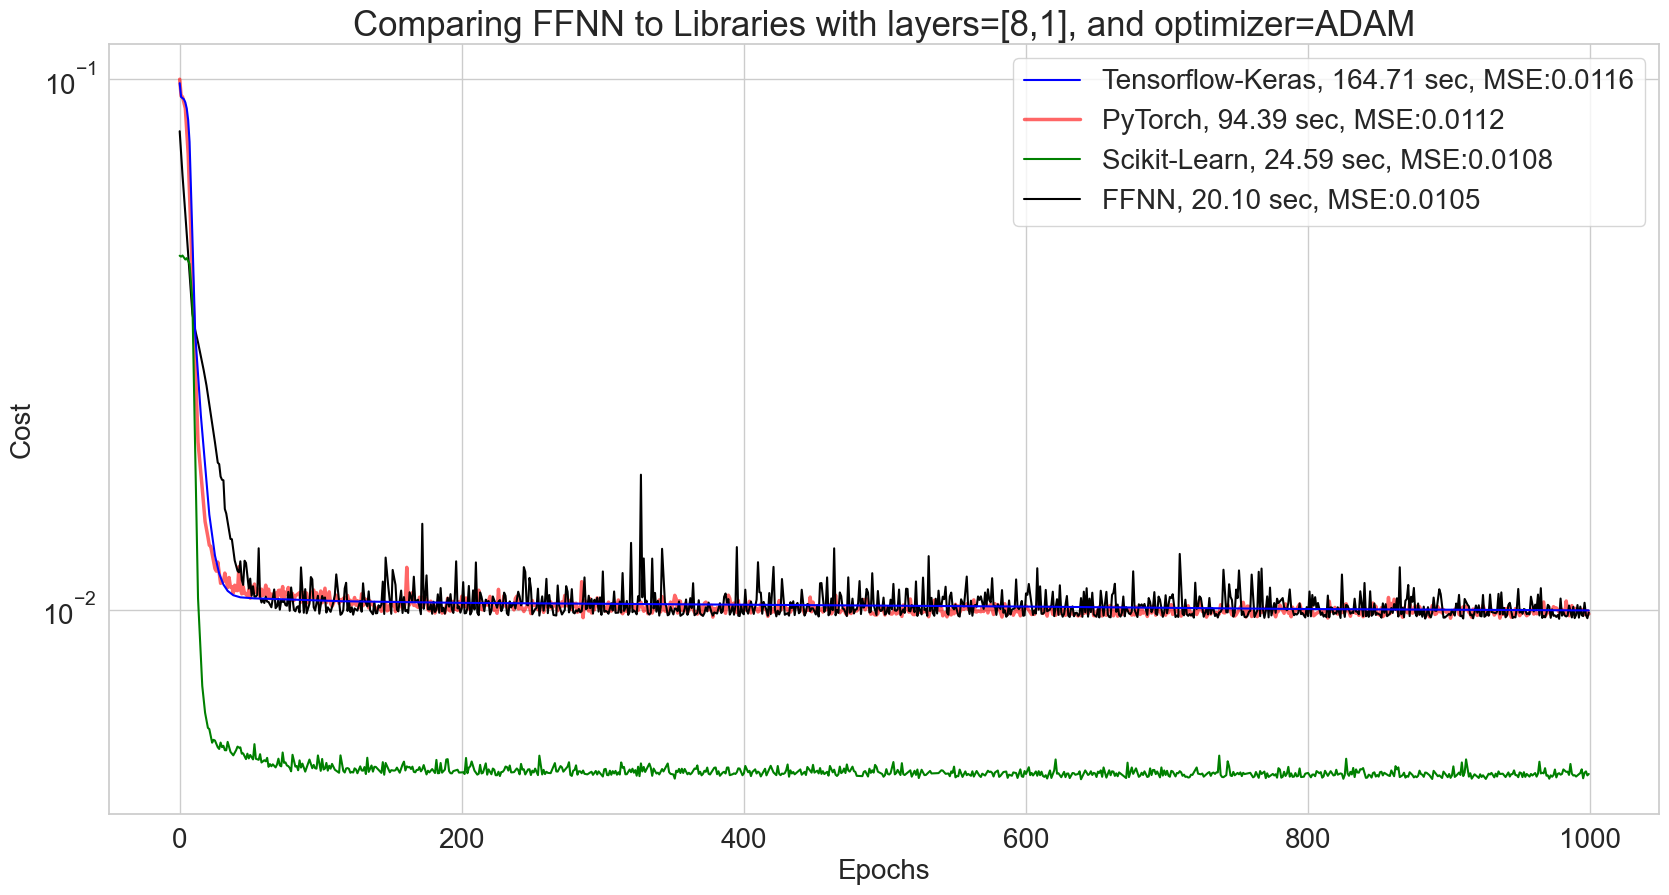

In [30]:
# Create a list of (MSE, plot data) tuples
plot_data = [
    (mse_pytorch, (loss_history, 'r', 'PyTorch', elapsed_time_pytorch)),
    (mse_proj2, (Regression_FFNN.get_info()["Cost_history"], 'k', 'FFNN', elapsed_time_FFNN)),
    (mse_sklearn, (sklearn_model.loss_curve_, 'g', 'Scikit-Learn', elapsed_time_scikit)),
    (mse_keras, (history.history['loss'], 'b', 'Tensorflow-Keras', elapsed_time_keras)),
]
# Sort the data by MSE in descending order
plot_data.sort(key=lambda x: x[0], reverse=True)
# Plot the data
plt.figure(figsize=(20,10))
for mse_plot, (data, color, label, elapsed_time) in plot_data:
    if label == 'PyTorch':
        plt.plot(data, c=color, linewidth=2.5, linestyle='-', alpha=0.6,
                label=f'{label}, {elapsed_time:.2f} sec, MSE:{mse_plot:.4f}', 
                zorder=100)  # Use MSE for zorder
    else:
        plt.plot(data, c=color, linewidth=1.5, linestyle='-',
                label=f'{label}, {elapsed_time:.2f} sec, MSE:{mse_plot:.4f}', 
                zorder=mse_plot * 10000)  # Use MSE for zorder
        print(mse_plot*10000)
plt.xlabel("Epochs", fontsize=20)
plt.ylabel("Cost", fontsize=20)
plt.yscale("log")
plt.title("Comparing FFNN to Libraries with layers=[8,1], and optimizer=ADAM", fontsize=25)
plt.legend(fontsize=20)
# Increase tick label font size
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show()

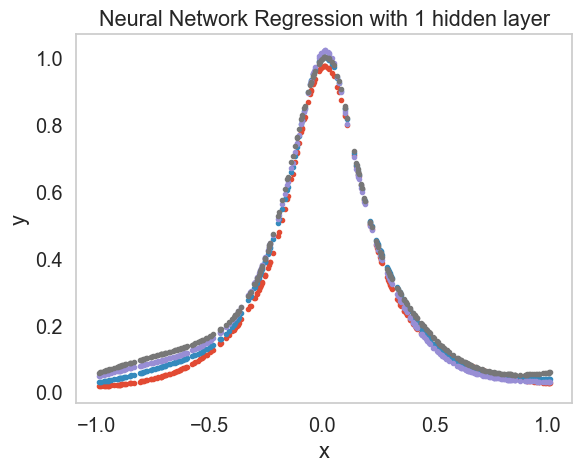

In [27]:
plt.plot(x_test, y_pred, ".", label="1 layer NN Prediction after 100000 epochs")
plt.plot(x_test, y_pred_sklearn, ".", label="2 layer NN Prediction after 100000 epochs")
plt.plot(x_test, y_pred_pytorch, ".", label="2 layer NN Prediction after 100000 epochs")
plt.plot(x_test, y_pred_keras, ".", label="2 layer NN Prediction after 100000 epochs")
#plt.legend()
plt.grid()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Neural Network Regression with 1 hidden layer")
plt.show()

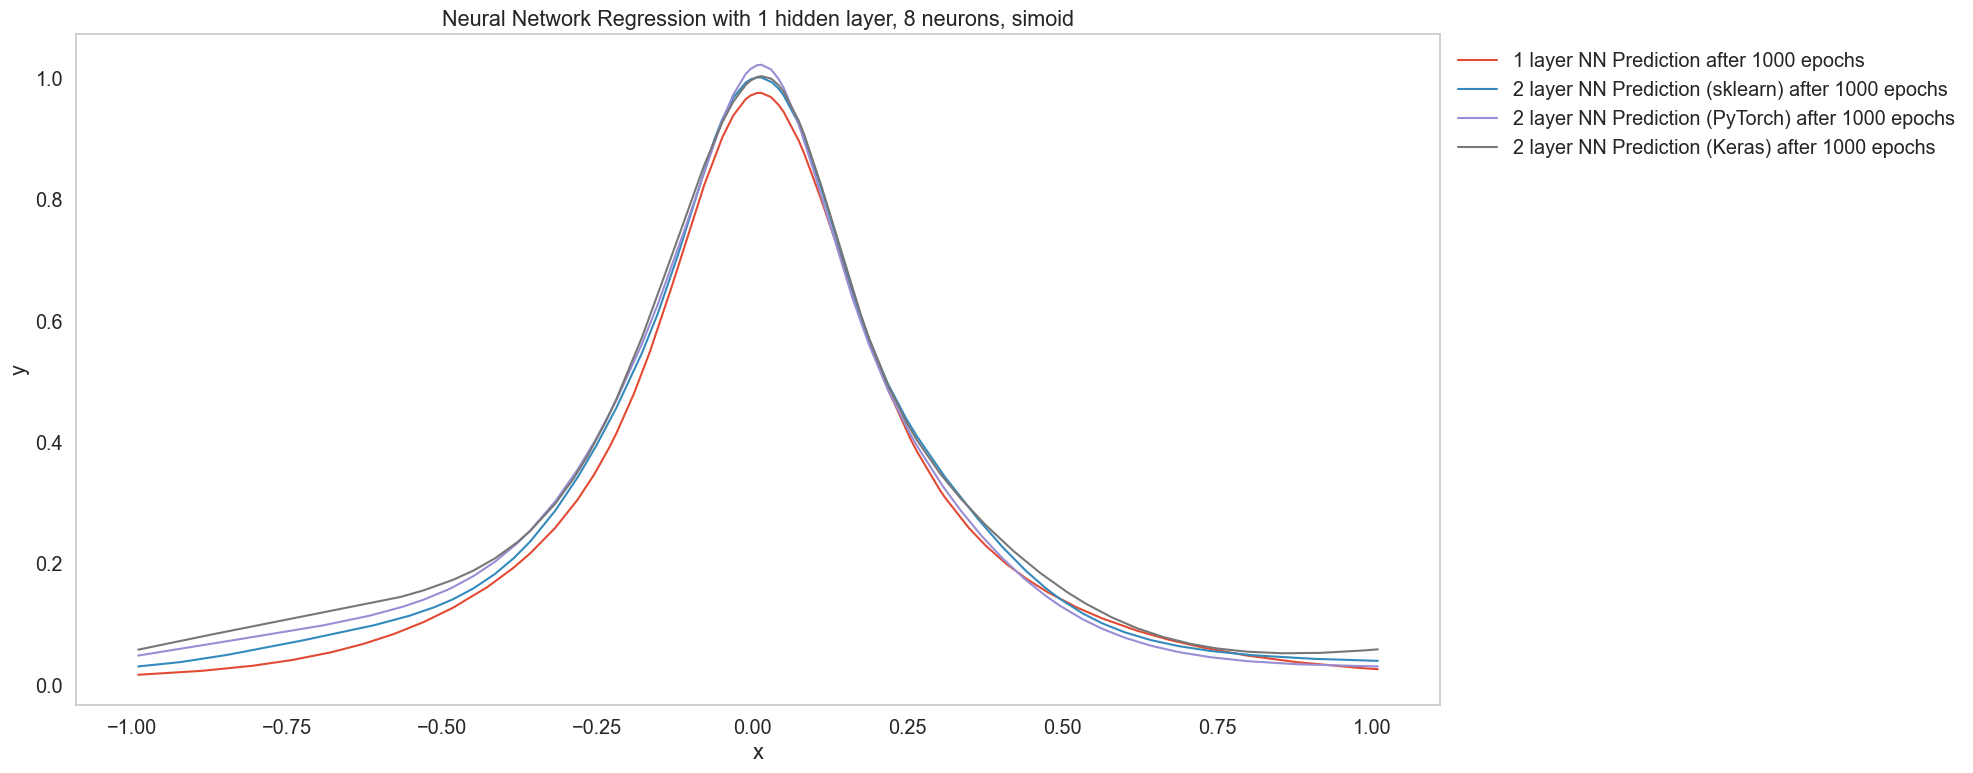

In [28]:
# Ensure x_test is a 1D array
x_test = x_test.flatten()  # Use .ravel() if you want to preserve a copy of the original array

# Sort the data
sorted_indices = np.argsort(x_test)
x_sorted = x_test[sorted_indices]

# Flatten y predictions to 1D
y_sorted = {
    "1 layer NN": y_pred[sorted_indices].flatten(),
    "2 layer NN (sklearn)": y_pred_sklearn[sorted_indices].flatten(),
    "2 layer NN (PyTorch)": y_pred_pytorch[sorted_indices].flatten(),
    "2 layer NN (Keras)": y_pred_keras[sorted_indices].flatten(),
}

# Plotting
plt.figure(figsize=(20, 8))
plt.plot(x_sorted, y_sorted["1 layer NN"], "-", label="1 layer NN Prediction after 1000 epochs")
plt.plot(x_sorted, y_sorted["2 layer NN (sklearn)"], "-", label="2 layer NN Prediction (sklearn) after 1000 epochs")
plt.plot(x_sorted, y_sorted["2 layer NN (PyTorch)"], "-", label="2 layer NN Prediction (PyTorch) after 1000 epochs")
plt.plot(x_sorted, y_sorted["2 layer NN (Keras)"], "-", label="2 layer NN Prediction (Keras) after 1000 epochs")

plt.grid()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Neural Network Regression with 1 hidden layer, 8 neurons, simoid")

# Move the legend outside of the plot
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), frameon=False)

plt.tight_layout()  # Adjust layout to accommodate legend
plt.show()


##### 2) Test against Autograd or 

Also test that your derivatives are correctly
calculated using automatic differentiation, using for example the
**Autograd** library or the **JAX** library. It is optional to implement
these libraries for the present project. In this project they serve as
useful tests of our derivatives.

In [29]:
import autograd.numpy as np
from autograd import grad

# Define the cost function for a one-layer neural network
def cost_one_layer(W, b, x, target):
    z = np.dot(W, x) + b
    a = 1.0 / (1 + np.exp(-z))  # Sigmoid activation
    return np.mean((a - target) ** 2)  # Mean squared error

# Mean Squared Error derivative
def mse_der(predict, target):
    target = target.reshape(-1)  # Ensure target is a 1D array
    assert predict.shape == target.shape, "Not same"
    return 2 * (predict - target) / target.size

# Sigmoid activation function
def sigmoid(z):
    return 1.0 / (1 + np.exp(-z))

# Derivative of sigmoid function
def sigmoid_der(z):
    sig = sigmoid(z)
    return sig * (1 - sig)

# Random input and target for testing
x = np.random.rand(2)
target = np.random.rand(3)

# Random weights and bias
W = np.random.rand(3, 2)
b = np.random.rand(3)

# Calculate gradients using autograd
autograd_one_layer = grad(cost_one_layer, [0, 1])

# Compute the activations and predictions
z = W @ x + b
a = sigmoid(z)
predict = a

# Calculate the derivatives for backpropagation
dC_da = mse_der(predict.reshape(-1), target)  # Ensure same shape

da_dz = sigmoid_der(z)

dC_dz = dC_da * da_dz

dC_dW = np.outer(dC_dz, x)  # Gradient wrt weights

dC_db = dC_dz  # Gradient wrt biases

# Print the computed gradients and derivatives
print("\n--- Backpropagation Derivatives ---")
print(f"Weight Gradient (dC/dW):\n{dC_dW}\n")
print(f"Bias Gradient (dC/db):\n{dC_db}\n")

# Compute the gradients using autograd
W_g, b_g = autograd_one_layer(W, b, x, target)

# Print autograd gradients
print("--- Autograd Gradients ---")
print(f"Weight Gradient from Autograd (dC/dW):\n{W_g}\n")
print(f"Bias Gradient from Autograd (dC/db):\n{b_g}\n")

# Optional: compare the results to see if they're similar
print("--- Comparison of Gradients ---")
print(f"Difference in Weight Gradients:\n{W_g - dC_dW}\n")
print(f"Difference in Bias Gradients:\n{b_g - dC_db}\n")



--- Backpropagation Derivatives ---
Weight Gradient (dC/dW):
[[0.00629013 0.00315343]
 [0.01102999 0.00552966]
 [0.00447868 0.0022453 ]]

Bias Gradient (dC/db):
[0.0437021  0.07663333 0.03111665]

--- Autograd Gradients ---
Weight Gradient from Autograd (dC/dW):
[[0.00629013 0.00315343]
 [0.01102999 0.00552966]
 [0.00447868 0.0022453 ]]

Bias Gradient from Autograd (dC/db):
[0.0437021  0.07663333 0.03111665]

--- Comparison of Gradients ---
Difference in Weight Gradients:
[[ 0.00000000e+00  0.00000000e+00]
 [-1.73472348e-18 -8.67361738e-19]
 [ 0.00000000e+00  0.00000000e+00]]

Difference in Bias Gradients:
[ 0.00000000e+00 -1.38777878e-17  0.00000000e+00]



## Optional (at least two)


1. Implement **Logistic Regression as simple classification model case** (equivalent to a Neural Network with just the output layer)

2. Compute the gradient of the neural network with **autograd**, to show that it gives the same result as your **hand-written backpropagation**.

3. **Compare** your results with results from using a **machine-learning library** like pytorch (https://docs.pytorch.org/tutorials/beginner/basics/buildmodel_tutorial.html)

4. Use a **more complex classification dataset** instead, like the fashion MNIST (see <https://www.kaggle.com/datasets/zalando-research/fashionmnist>)

5. Use a **more complex regression dataset** instead, like the two-dimensional Runge function $f(x,y)=\left[(10x - 5)^2 + (10y - 5)^2 + 1 \right]^{-1}$, or even more complicated two-dimensional functions (see the supplementary material of <https://www.nature.com/articles/s41467-025-61362-4> for an extensive list of two-dimensional functions). 

6. **Compute and interpret a confusion matrix of your best classification model** (see <https://www.researchgate.net/figure/Confusion-matrix-of-MNIST-and-F-MNIST-embeddings_fig5_349758607>)